# CS334FinalProject House Sale Price Prediction

Instructions To Use Prediction App:

1. git clone https://github.com/qyccc3/CS334FinalProject.git
2. cd CS334FinalProject
3. python HousePricePredictionApp.py

**Make sure you have python3 installed and tkinter, pandas, sklearn library installed to use the application.**


# Data Processing and Models Used

Dataset: Ames Housing Dataset collecting from [https://www.kaggle.com/datasets/prevek18/ames-housing-dataset]()

We've manually selected and deleted the dataset from a total of 82 attributes to 31 attributes at the beginning.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv("./ManualPreprocessedAmesHousing.csv")
dataset.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Lot Config,Bldg Type,House Style,Overall Qual,Overall Cond,...,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Sale Type,Sale Condition,SalePrice
0,20,RL,141,31770,IR1,Corner,1Fam,1Story,6,5,...,P,210,62,0,0,0,0,WD,Normal,215.0
1,20,RH,80,11622,Reg,Inside,1Fam,1Story,5,6,...,Y,140,0,0,0,120,0,WD,Normal,105.0
2,20,RL,81,14267,IR1,Corner,1Fam,1Story,6,6,...,Y,393,36,0,0,0,0,WD,Normal,172.0
3,20,RL,93,11160,Reg,Corner,1Fam,1Story,7,5,...,Y,0,0,0,0,0,0,WD,Normal,244.0
4,60,RL,74,13830,IR1,Inside,1Fam,2Story,5,5,...,Y,212,34,0,0,0,0,WD,Normal,189.9


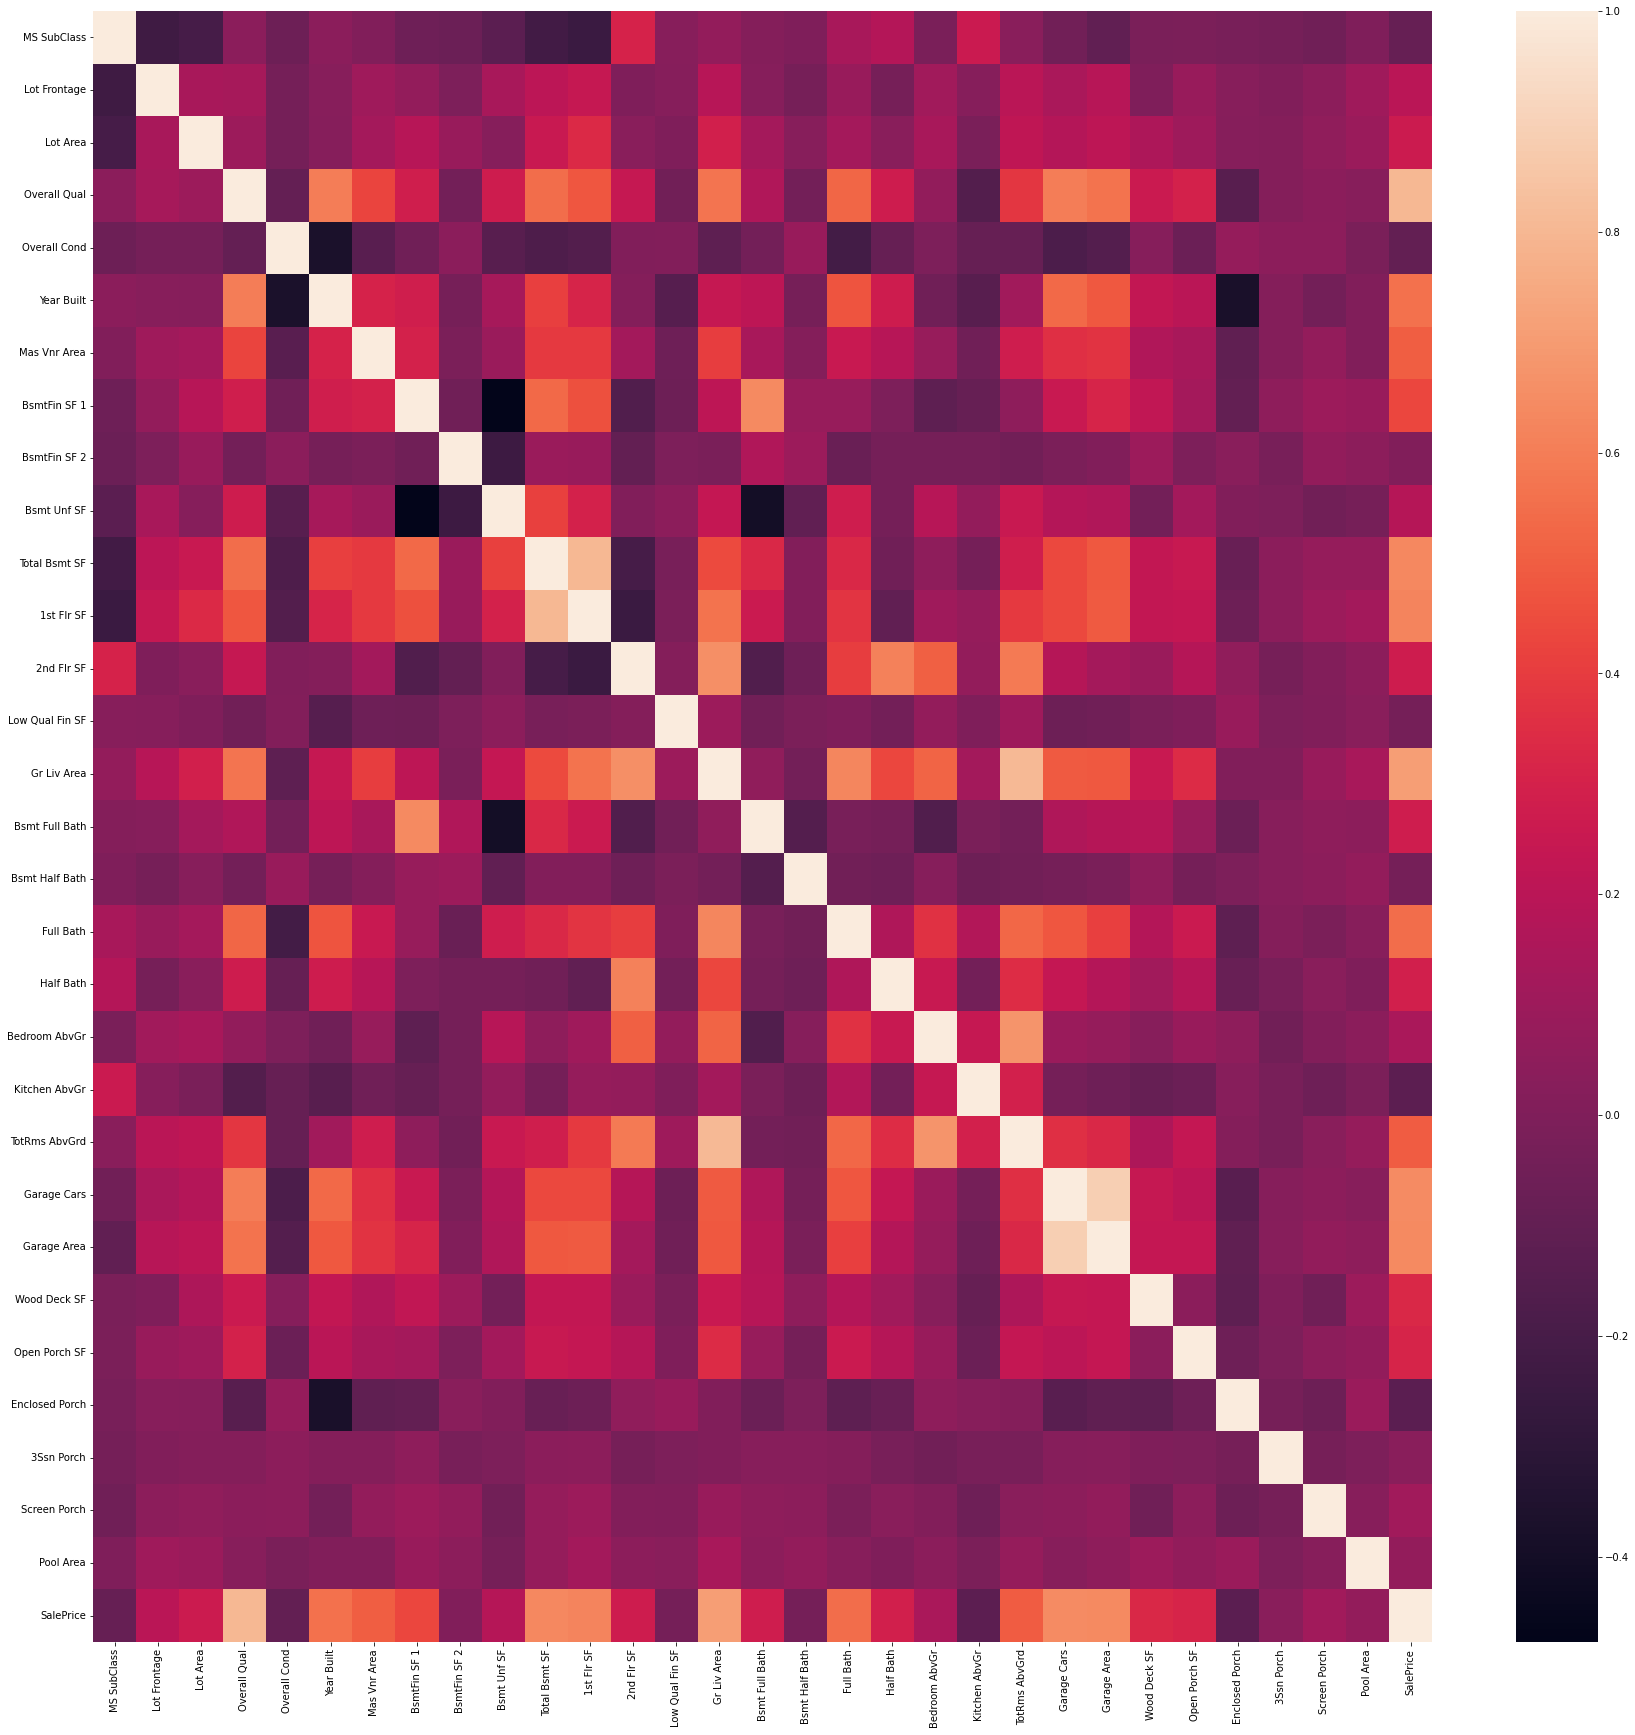

In [2]:
plt.figure(figsize=(30, 30))
sns.heatmap(dataset.corr())
plt.show()

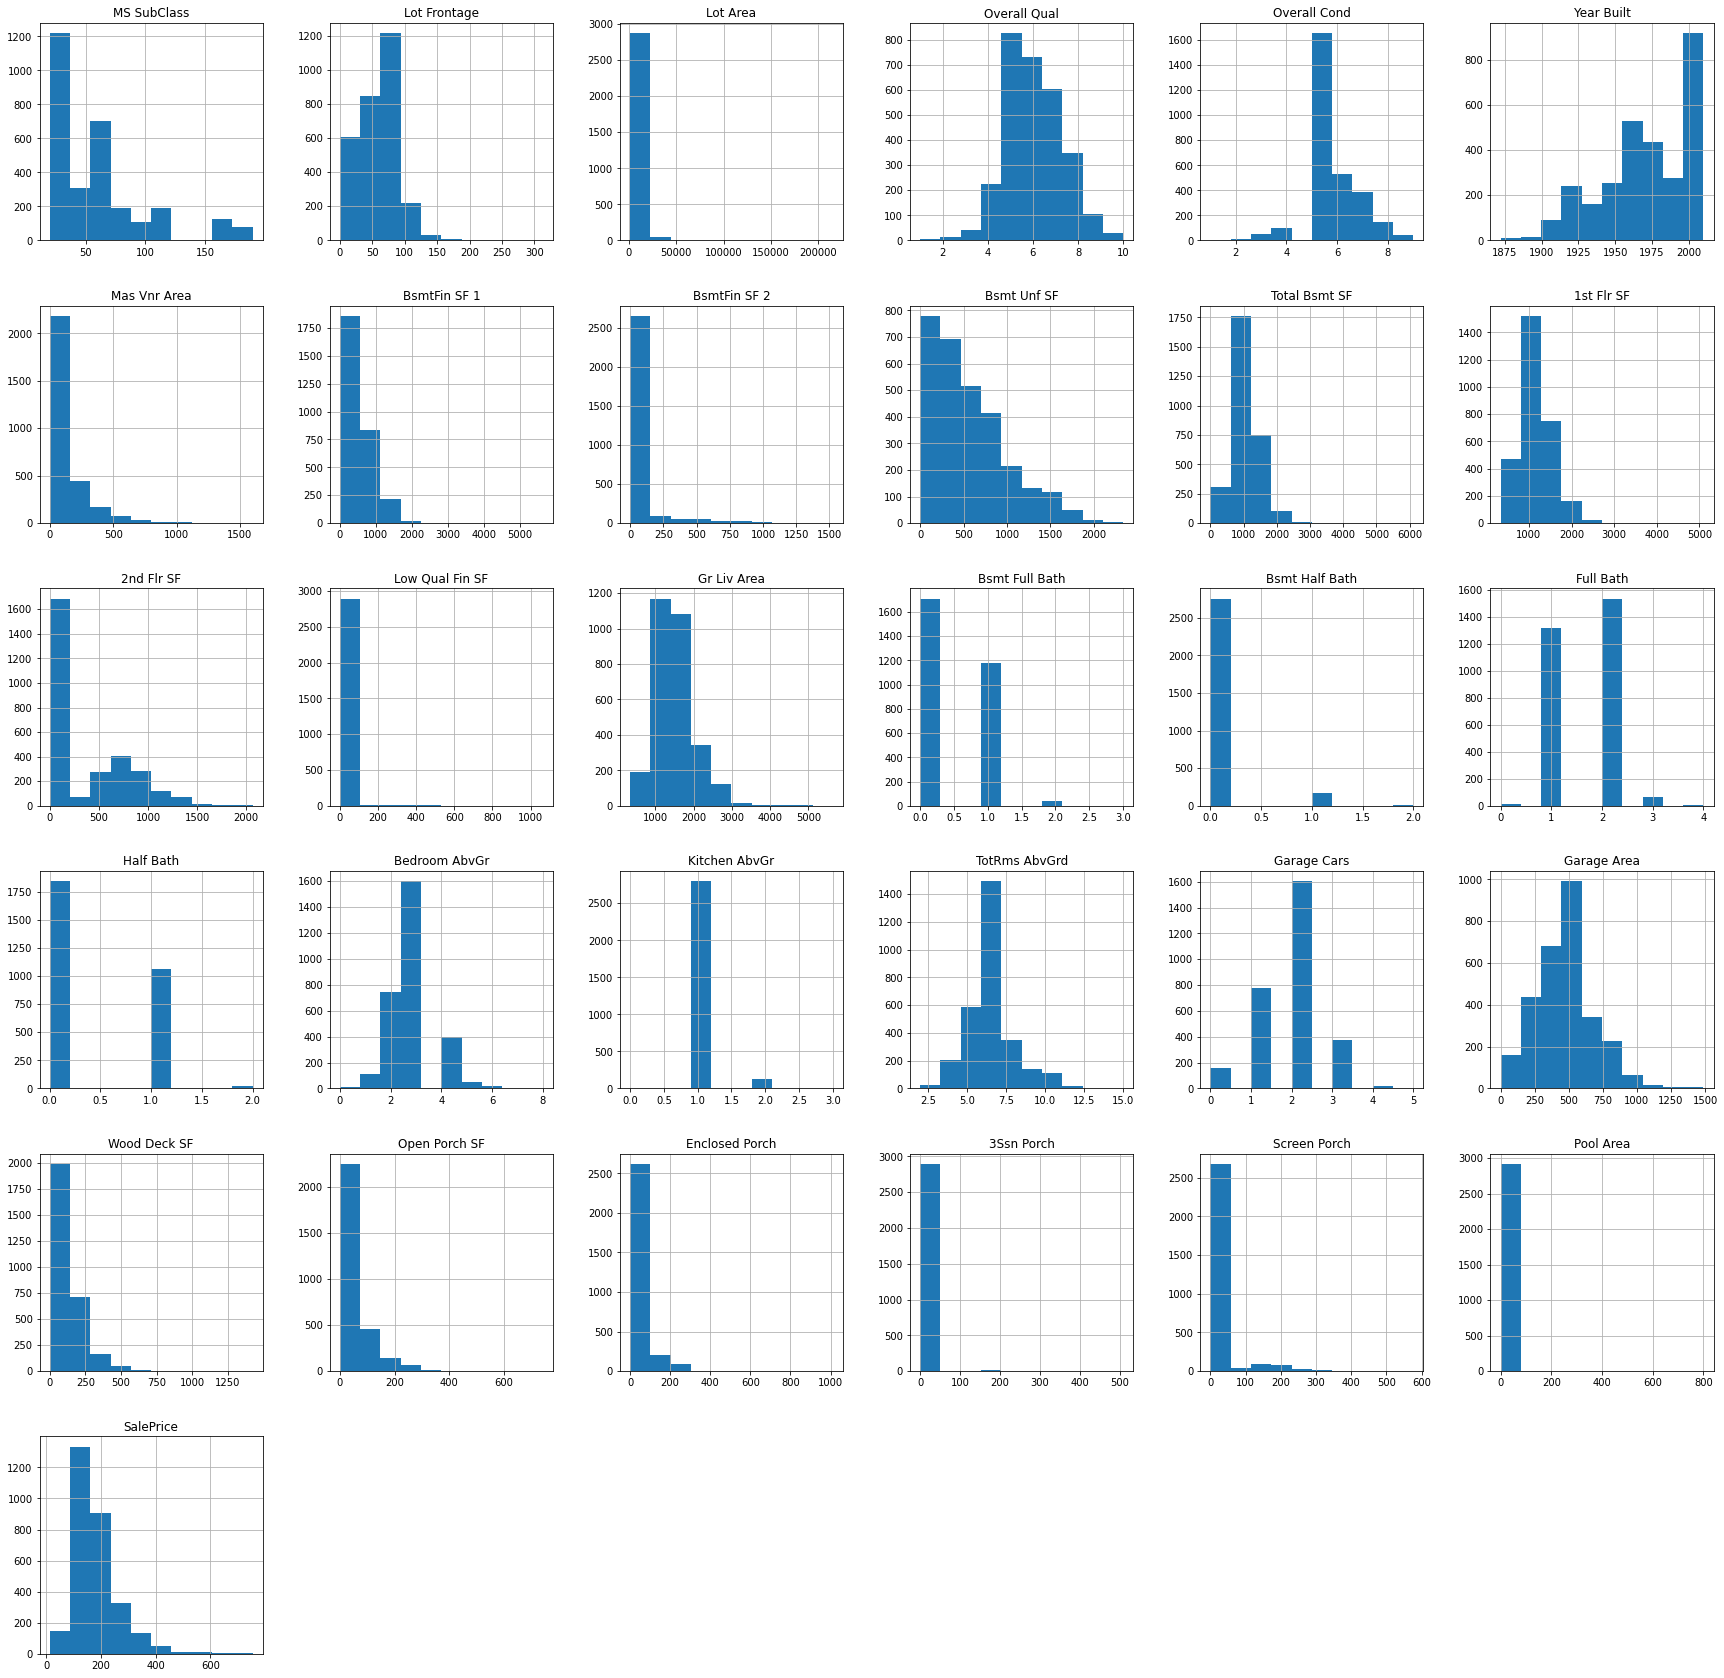

In [3]:
dataset.hist(figsize=(30, 30))
plt.show()

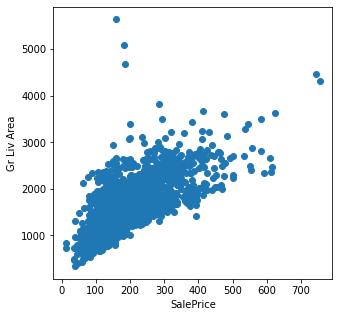

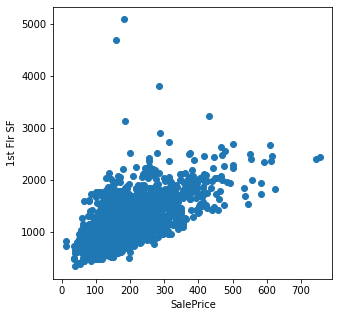

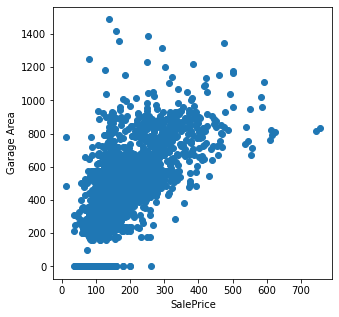

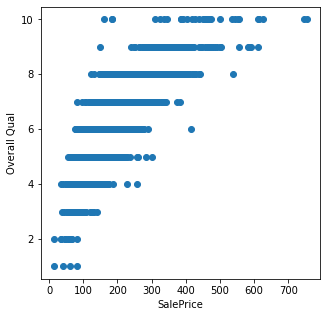

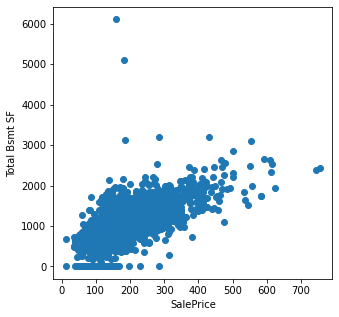

In [4]:
for column in dataset.columns:
    if column in ['Gr Liv Area', '1st Flr SF', 'Garage Area', 'Overall Qual', 'Total Bsmt SF']:
        fig, ax = plt.subplots(figsize=(5,5))
        ax.scatter(dataset['SalePrice'], dataset[column])
        ax.plot
        ax.set_xlabel('SalePrice')
        ax.set_ylabel(column)
        plt.show()
# Only Show The Top 5 Correlated Features

After reviewing the scatter plots bewteen SalePrice and other columns, we picked the 5 most deteminant attributes that show high correlation with SalePrice: '**Gr Liv Area**', '**1st Flr SF**', '**Garage Area**', '**Overall Qual**', '**Total Bsmt SF**', '**SalePrice**' 

# Models Used
**Decision Tree**\
**Linear Regression**\
**KMeans**

We categorized SalePrice for classification models based on 4 quantiles of the dataset:

In [17]:
house_data = pd.read_csv("./ManualPreprocessedAmesHousing.csv")[['Gr Liv Area', '1st Flr SF', 'Garage Area', 'Overall Qual', 'Total Bsmt SF','SalePrice']]
print("25 percentile of the data")
print('\t',int(house_data['SalePrice'].quantile(0.25)*1000), '== 0')
print("50 percentile of the data")
print('\t',int(house_data['SalePrice'].quantile(0.5)*1000), '== 1')
print("75 percentile of the data")
print('\t',int(house_data['SalePrice'].quantile(0.75)*1000), '== 2')
print("90 percentile of the data")
print('\t',int(house_data['SalePrice'].quantile(0.9)*1000), '== 3')

25 percentile of the data
	 129500 == 0
50 percentile of the data
	 160000 == 1
75 percentile of the data
	 213500 == 2
90 percentile of the data
	 281241 == 3


In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import graphviz
dataset = pd.read_csv("./ManualPreprocessedAmesHousingClassification.csv")[['Gr Liv Area', '1st Flr SF', 'Garage Area', 'Overall Qual', 'Total Bsmt SF','SalePrice']]

## Decision Tree

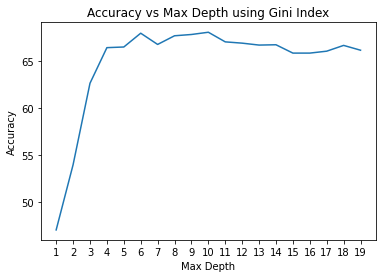

In [7]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=100, shuffle=True)
kf.get_n_splits(dataset)
depth = range(1,20)
accuracy = []
for max_d in depth:
    avg_accuracy = 0
    for train, test in kf.split(dataset):
        train_data = dataset.iloc[train]
        test_data = dataset.iloc[test]
        dt = DecisionTreeClassifier(criterion='gini', max_depth=max_d, random_state=100)
        dt.fit(train_data.drop('SalePrice', axis=1), train_data['SalePrice'])
        y_pred = dt.predict(test_data.drop('SalePrice', axis=1))
        # find average
        avg_accuracy += accuracy_score(test_data['SalePrice'], y_pred)
    accuracy.append(avg_accuracy/10*100)
plt.plot(depth, accuracy)
plt.xticks(depth)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth using Gini Index')
plt.show()

In [21]:
avg_accuracy = 0
print("10 Fold Cross Validation Using Gini Index, Max Depth 6: ")
for train, test in kf.split(dataset):
    train_data = dataset.iloc[train]
    test_data = dataset.iloc[test]
    dt = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=100)
    dt.fit(train_data.drop('SalePrice', axis=1), train_data['SalePrice'])
    y_pred = dt.predict(test_data.drop('SalePrice', axis=1))
    # find average
    avg_accuracy += accuracy_score(test_data['SalePrice'], y_pred)
    # print("\tAccuracy is ", accuracy_score(test_data['SalePrice'], y_pred)*100)
print("Average accuracy is ", avg_accuracy/10*100)
avg_accuracy = 0
print("10 Fold Cross Validation Using Entropy, Max Depth 6:")
for train, test in kf.split(dataset):
    train_data = dataset.iloc[train]
    test_data = dataset.iloc[test]
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=100)
    dt.fit(train_data.drop('SalePrice', axis=1), train_data['SalePrice'])
    y_pred = dt.predict(test_data.drop('SalePrice', axis=1))
    # find average
    avg_accuracy += accuracy_score(test_data['SalePrice'], y_pred)
    # print("\tAccuracy is ", accuracy_score(test_data['SalePrice'], y_pred)*100)
print("Average accuracy is ", avg_accuracy/10*100)

10 Fold Cross Validation Using Gini Index, Max Depth 6: 
Average accuracy is  67.98634812286689
10 Fold Cross Validation Using Entropy, Max Depth 6:
Average accuracy is  66.9283276450512


In [22]:
# Best Max Depth is 6, using Gini Index
dt = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=100)
dt.fit(train_data.drop('SalePrice', axis=1), train_data['SalePrice'])
y_pred = dt.predict(test_data.drop('SalePrice', axis=1))
print("Accuracy is ", accuracy_score(test_data['SalePrice'], y_pred)*100)

Accuracy is  67.23549488054607


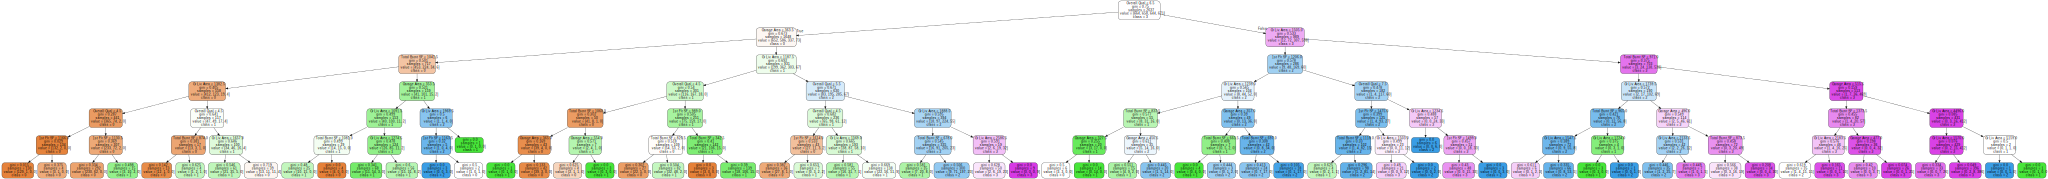

In [23]:
class_names = ['0', '1', '2', '3']
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names = train_data.drop('SalePrice', axis=1).columns,
                                class_names = class_names,
                                filled = True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data) 
graph

## KMeans

In [24]:
"""
Fit KMeans to the data without applying PCA
"""
kf = KFold(n_splits=10)
kf.get_n_splits(dataset)

avg_mse = 0
avg_acc = 0
for train, test in kf.split(dataset):
    train_data = dataset.iloc[train]
    test_data = dataset.iloc[test]
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(train_data.drop("SalePrice", axis=1),train_data['SalePrice'])
    y_pred = kmeans.predict(test_data.drop("SalePrice", axis=1))
    # print("Mean Squared Error: ", mean_squared_error(y_pred, test_data['SalePrice']))
    # print("Arrucary: ", accuracy_score(y_pred, test_data['SalePrice']))
    avg_mse += mean_squared_error(y_pred, test_data['SalePrice'])
    avg_acc += accuracy_score(y_pred, test_data['SalePrice'])
print("Average Mean Squared Error: ", avg_mse/10)
print("Average Arrucary: ", avg_acc/10)

Average Mean Squared Error:  2.151535836177474
Average Arrucary:  0.3006825938566553


In [25]:
"""
Fit KMeans to the data after applying PCA
"""
pca = PCA(n_components=2)
pca.fit(dataset.drop('SalePrice', axis=1))
x_data = pca.transform(dataset.drop('SalePrice', axis=1))
x_data = pd.DataFrame(x_data)
y_data = dataset['SalePrice']
y_data = pd.DataFrame(y_data)
kf = KFold(n_splits=10)
kf.get_n_splits(dataset)
avg_mse = 0
avg_acc = 0
for train, test in kf.split(x_data):
    x_train = x_data.iloc[train]
    x_test = x_data.iloc[test]
    y_train = y_data.iloc[train]
    y_test = y_data.iloc[test]
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(x_train,y_train)
    y_pred = kmeans.predict(x_test)
    # print("Mean Squared Error: ", mean_squared_error(y_pred, test_data['SalePrice']))
    # print("Arrucary: ", accuracy_score(y_pred, test_data['SalePrice']))
    avg_mse += mean_squared_error(y_pred, y_test)
    avg_acc += accuracy_score(y_pred, test_data['SalePrice'])
print("Average Mean Squared Error: ", avg_mse/10)
print("Average Arrucary: ", avg_acc/10)

Average Mean Squared Error:  1.9406143344709896
Average Arrucary:  0.2402730375426621


## Linear Regression

In [26]:
# Linear Regression on Original Data
kFold = KFold(n_splits=10, shuffle=True, random_state=0)
dataset_orig = pd.get_dummies(pd.read_csv("./ManualPreprocessedAmesHousing.csv"))
X_orig = dataset_orig.drop(columns=["SalePrice"])
y_orig = dataset_orig["SalePrice"]
kFold = KFold(n_splits=10, shuffle=True, random_state=0)
avgMSE = 0
avgR2 = 0
for train, test in kFold.split(X_orig):
    X_train_fold, X_test_fold = X_orig.iloc[train], X_orig.iloc[test]
    y_train_fold, y_test_fold = y_orig.iloc[train], y_orig.iloc[test]
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_test_fold)
    avgMSE += mean_squared_error(y_test_fold, y_pred)
    avgR2 += model.score(X_test_fold, y_test_fold)
print("Average MSE: ", avgMSE/10)
print("Average R2: ", avgR2/10)

Average MSE:  935.6220729544648
Average R2:  0.8555372323665559


In [27]:
"""
Linear Regression on Filtered Data
"""
dataset_filtered = pd.read_csv("./ManualPreprocessedAmesHousing.csv")[['Gr Liv Area', '1st Flr SF', 'Garage Area', 'Overall Qual', 'Total Bsmt SF','SalePrice']]
X_filtered = dataset_filtered.drop(columns=["SalePrice"])
y_filtered = dataset_filtered["SalePrice"]
kFold = KFold(n_splits=10, shuffle=True, random_state=0)
avgMSE = 0
avgR2 = 0
for train, test in kFold.split(X_filtered):
    X_train_fold, X_test_fold = X_filtered.iloc[train], X_filtered.iloc[test]
    y_train_fold, y_test_fold = y_filtered.iloc[train], y_filtered.iloc[test]
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_test_fold)
    avgMSE += mean_squared_error(y_test_fold, y_pred)
    avgR2 += model.score(X_test_fold, y_test_fold)
print("Average MSE: ", avgMSE/10)
print("Average R2: ", avgR2/10)

Average MSE:  1428.9737943338919
Average R2:  0.7777471605626946


Mean Squared Error:  1400.2244916039772
R2:  0.7803537073215394


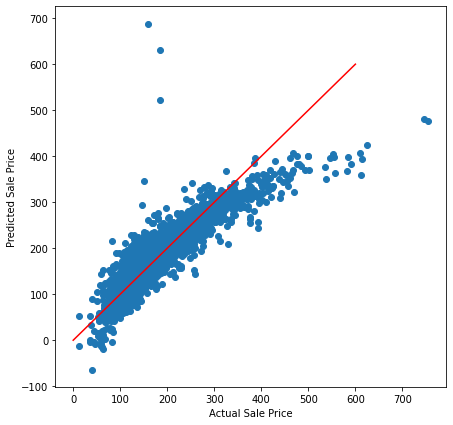

In [34]:
lr = LinearRegression()
lr.fit(dataset_filtered.drop('SalePrice', axis=1), dataset_filtered['SalePrice'])
y_pred = lr.predict(dataset_filtered.drop('SalePrice', axis=1))
print("Mean Squared Error: ", mean_squared_error(y_pred, dataset_filtered['SalePrice']))
print("R2: ", model.score(dataset_filtered.drop('SalePrice', axis=1), dataset_filtered['SalePrice']))
fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter(dataset_filtered['SalePrice'], y_pred)
x = np.linspace(0, 600, 1000)
plt.plot(x, x, color='red')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()